In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import nltk
import re

import string
import collections

#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn import preprocessing
import lightgbm

In [3]:
data=pd.read_csv('dataset_00_with_header.csv')

#Remove constant-valued features (x067, x094, x095, x096): no prediction power; 
constant_feat=[]
for i in data.columns:
    a=data[i].nunique()
    if a==1:
        constant_feat.append(i)
print(constant_feat)
        
#Remove 4 features w/ only 1 constant value; 
data.drop(constant_feat, axis=1, inplace=True)

['x067', 'x094', 'x095', 'x096']


In [4]:
#Train-test split; 
xtrain, xtest, ytrain, ytest = train_test_split(data.drop('y', axis=1), data['y'], test_size=0.3, random_state=2018) 

#Imputation;   
medians=xtrain.median()
xtrain.fillna(medians, inplace=True)
xtest.fillna(medians, inplace=True)

In [ ]:
'''
#Approach 1: RandomForestRegressor; 
regr = RandomForestRegressor(random_state=1000, n_estimators=200)
regr = regr.fit(xtrain, ytrain)

import pickle
#Save the classifier; 
with open('wh_pred.pickle', 'wb') as f:
    pickle.dump(regr, f)

with open('wh_pred.pickle', 'rb') as f:
    regr=pickle.load(f)
print(regr)

ytest_pred = regr.predict(xtest)
'''

In [13]:
'''
##Approach 2: Lightgbm (no cross validation);
params = {'boosting_type': 'gbdt',
          'objective': 'regression',
          'metric': 'rmse',
          'max_depth': 10, 
          'learning_rate': 0.1,
          'verbose_eval': 10, 
          'early_stopping_round': 100}

n_estimators = 10000    
d_train = lightgbm.Dataset(xtrain, label=ytrain)
d_test = lightgbm.Dataset(xtest, label=ytest)
watchlist = [d_train, d_test]

model = lightgbm.train(params=params, train_set=d_train, num_boost_round=n_estimators, valid_sets=watchlist)  #replace watchlist with valid_sets=d_test


import pickle 
with open('lightgbm.pickle', 'wb') as f:
    pickle.dump(model, f)

with open('lightgbm.pickle', 'rb') as f:
    model=pickle.load(f)
print(model)


ytest_pred = model.predict(xtest)    
'''

C:\Users\Yunsun2\Anaconda3\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's rmse: 108.649	valid_1's rmse: 108.643
Training until validation scores don't improve for 100 rounds.
[2]	training's rmse: 99.9248	valid_1's rmse: 99.9236
[3]	training's rmse: 92.18	valid_1's rmse: 92.1944
[4]	training's rmse: 85.3022	valid_1's rmse: 85.3478
[5]	training's rmse: 79.0375	valid_1's rmse: 79.0943
[6]	training's rmse: 73.5049	valid_1's rmse: 73.5834
[7]	training's rmse: 68.6763	valid_1's rmse: 68.7677
[8]	training's rmse: 64.3635	valid_1's rmse: 64.4811
[9]	training's rmse: 60.491	valid_1's rmse: 60.642
[10]	training's rmse: 57.1281	valid_1's rmse: 57.291
[11]	training's rmse: 54.1307	valid_1's rmse: 54.3155
[12]	training's rmse: 51.4405	valid_1's rmse: 51.6624
[13]	training's rmse: 49.0168	valid_1's rmse: 49.273
[14]	training's rmse: 46.8981	valid_1's rmse: 47.1874
[15]	training's rmse: 44.9623	valid_1's rmse: 45.2698
[16]	training's rmse: 43.3017	valid_1's rmse: 43.643
[17]	training's rmse: 41.8558	valid_1's rmse: 42.2284
[18]	training's rmse: 40.4918	valid

[152]	training's rmse: 24.8991	valid_1's rmse: 26.998
[153]	training's rmse: 24.8811	valid_1's rmse: 26.9933
[154]	training's rmse: 24.8603	valid_1's rmse: 26.9881
[155]	training's rmse: 24.8429	valid_1's rmse: 26.9844
[156]	training's rmse: 24.8136	valid_1's rmse: 26.9675
[157]	training's rmse: 24.7968	valid_1's rmse: 26.961
[158]	training's rmse: 24.7801	valid_1's rmse: 26.9548
[159]	training's rmse: 24.7601	valid_1's rmse: 26.947
[160]	training's rmse: 24.7432	valid_1's rmse: 26.9389
[161]	training's rmse: 24.7236	valid_1's rmse: 26.9326
[162]	training's rmse: 24.7034	valid_1's rmse: 26.9222
[163]	training's rmse: 24.6806	valid_1's rmse: 26.912
[164]	training's rmse: 24.6615	valid_1's rmse: 26.906
[165]	training's rmse: 24.6395	valid_1's rmse: 26.8943
[166]	training's rmse: 24.6229	valid_1's rmse: 26.8927
[167]	training's rmse: 24.6094	valid_1's rmse: 26.8927
[168]	training's rmse: 24.5952	valid_1's rmse: 26.8879
[169]	training's rmse: 24.5811	valid_1's rmse: 26.885
[170]	training's

[302]	training's rmse: 22.7509	valid_1's rmse: 26.3631
[303]	training's rmse: 22.7329	valid_1's rmse: 26.3547
[304]	training's rmse: 22.7204	valid_1's rmse: 26.3512
[305]	training's rmse: 22.7088	valid_1's rmse: 26.352
[306]	training's rmse: 22.6981	valid_1's rmse: 26.347
[307]	training's rmse: 22.6837	valid_1's rmse: 26.3383
[308]	training's rmse: 22.672	valid_1's rmse: 26.3368
[309]	training's rmse: 22.6627	valid_1's rmse: 26.3343
[310]	training's rmse: 22.652	valid_1's rmse: 26.3326
[311]	training's rmse: 22.6437	valid_1's rmse: 26.3308
[312]	training's rmse: 22.6338	valid_1's rmse: 26.3299
[313]	training's rmse: 22.6193	valid_1's rmse: 26.3276
[314]	training's rmse: 22.6096	valid_1's rmse: 26.3266
[315]	training's rmse: 22.602	valid_1's rmse: 26.3274
[316]	training's rmse: 22.5931	valid_1's rmse: 26.3272
[317]	training's rmse: 22.5762	valid_1's rmse: 26.324
[318]	training's rmse: 22.5607	valid_1's rmse: 26.318
[319]	training's rmse: 22.5498	valid_1's rmse: 26.3181
[320]	training's 

[453]	training's rmse: 21.1574	valid_1's rmse: 26.0392
[454]	training's rmse: 21.146	valid_1's rmse: 26.0377
[455]	training's rmse: 21.1322	valid_1's rmse: 26.0325
[456]	training's rmse: 21.1198	valid_1's rmse: 26.0299
[457]	training's rmse: 21.1079	valid_1's rmse: 26.028
[458]	training's rmse: 21.0967	valid_1's rmse: 26.0252
[459]	training's rmse: 21.0894	valid_1's rmse: 26.0273
[460]	training's rmse: 21.0814	valid_1's rmse: 26.0284
[461]	training's rmse: 21.0699	valid_1's rmse: 26.0285
[462]	training's rmse: 21.0636	valid_1's rmse: 26.0284
[463]	training's rmse: 21.0572	valid_1's rmse: 26.0288
[464]	training's rmse: 21.0498	valid_1's rmse: 26.0295
[465]	training's rmse: 21.0394	valid_1's rmse: 26.026
[466]	training's rmse: 21.0333	valid_1's rmse: 26.0252
[467]	training's rmse: 21.0279	valid_1's rmse: 26.0244
[468]	training's rmse: 21.0213	valid_1's rmse: 26.0234
[469]	training's rmse: 21.015	valid_1's rmse: 26.0234
[470]	training's rmse: 21.0094	valid_1's rmse: 26.0242
[471]	training

[606]	training's rmse: 19.8693	valid_1's rmse: 25.8454
[607]	training's rmse: 19.86	valid_1's rmse: 25.8426
[608]	training's rmse: 19.8475	valid_1's rmse: 25.8379
[609]	training's rmse: 19.8365	valid_1's rmse: 25.8381
[610]	training's rmse: 19.8328	valid_1's rmse: 25.8378
[611]	training's rmse: 19.8252	valid_1's rmse: 25.8376
[612]	training's rmse: 19.8201	valid_1's rmse: 25.8378
[613]	training's rmse: 19.8104	valid_1's rmse: 25.8351
[614]	training's rmse: 19.801	valid_1's rmse: 25.8323
[615]	training's rmse: 19.7958	valid_1's rmse: 25.832
[616]	training's rmse: 19.7866	valid_1's rmse: 25.8305
[617]	training's rmse: 19.7823	valid_1's rmse: 25.8305
[618]	training's rmse: 19.7751	valid_1's rmse: 25.8299
[619]	training's rmse: 19.7708	valid_1's rmse: 25.8291
[620]	training's rmse: 19.7646	valid_1's rmse: 25.8295
[621]	training's rmse: 19.7548	valid_1's rmse: 25.827
[622]	training's rmse: 19.7495	valid_1's rmse: 25.8278
[623]	training's rmse: 19.743	valid_1's rmse: 25.8273
[624]	training's

[760]	training's rmse: 18.712	valid_1's rmse: 25.6883
[761]	training's rmse: 18.7074	valid_1's rmse: 25.6874
[762]	training's rmse: 18.7046	valid_1's rmse: 25.6873
[763]	training's rmse: 18.6954	valid_1's rmse: 25.6861
[764]	training's rmse: 18.6897	valid_1's rmse: 25.6863
[765]	training's rmse: 18.6856	valid_1's rmse: 25.6865
[766]	training's rmse: 18.677	valid_1's rmse: 25.6846
[767]	training's rmse: 18.669	valid_1's rmse: 25.682
[768]	training's rmse: 18.6636	valid_1's rmse: 25.6817
[769]	training's rmse: 18.656	valid_1's rmse: 25.6821
[770]	training's rmse: 18.6467	valid_1's rmse: 25.681
[771]	training's rmse: 18.6441	valid_1's rmse: 25.6812
[772]	training's rmse: 18.6372	valid_1's rmse: 25.6812
[773]	training's rmse: 18.6297	valid_1's rmse: 25.6794
[774]	training's rmse: 18.6228	valid_1's rmse: 25.6797
[775]	training's rmse: 18.615	valid_1's rmse: 25.6798
[776]	training's rmse: 18.6027	valid_1's rmse: 25.6739
[777]	training's rmse: 18.597	valid_1's rmse: 25.6726
[778]	training's r

[912]	training's rmse: 17.7373	valid_1's rmse: 25.5794
[913]	training's rmse: 17.7331	valid_1's rmse: 25.5797
[914]	training's rmse: 17.728	valid_1's rmse: 25.5792
[915]	training's rmse: 17.7223	valid_1's rmse: 25.578
[916]	training's rmse: 17.7147	valid_1's rmse: 25.5754
[917]	training's rmse: 17.7083	valid_1's rmse: 25.5755
[918]	training's rmse: 17.7023	valid_1's rmse: 25.5751
[919]	training's rmse: 17.6951	valid_1's rmse: 25.5736
[920]	training's rmse: 17.689	valid_1's rmse: 25.5731
[921]	training's rmse: 17.6805	valid_1's rmse: 25.5691
[922]	training's rmse: 17.6768	valid_1's rmse: 25.5693
[923]	training's rmse: 17.6727	valid_1's rmse: 25.5689
[924]	training's rmse: 17.6687	valid_1's rmse: 25.569
[925]	training's rmse: 17.6652	valid_1's rmse: 25.5693
[926]	training's rmse: 17.6579	valid_1's rmse: 25.5669
[927]	training's rmse: 17.651	valid_1's rmse: 25.566
[928]	training's rmse: 17.6457	valid_1's rmse: 25.5653
[929]	training's rmse: 17.6383	valid_1's rmse: 25.5649
[930]	training's

[1061]	training's rmse: 16.8949	valid_1's rmse: 25.4999
[1062]	training's rmse: 16.8918	valid_1's rmse: 25.4998
[1063]	training's rmse: 16.8888	valid_1's rmse: 25.5006
[1064]	training's rmse: 16.8824	valid_1's rmse: 25.5002
[1065]	training's rmse: 16.8784	valid_1's rmse: 25.4992
[1066]	training's rmse: 16.8749	valid_1's rmse: 25.4995
[1067]	training's rmse: 16.872	valid_1's rmse: 25.499
[1068]	training's rmse: 16.8666	valid_1's rmse: 25.4986
[1069]	training's rmse: 16.8633	valid_1's rmse: 25.4988
[1070]	training's rmse: 16.8559	valid_1's rmse: 25.4969
[1071]	training's rmse: 16.8513	valid_1's rmse: 25.4967
[1072]	training's rmse: 16.8446	valid_1's rmse: 25.4953
[1073]	training's rmse: 16.8397	valid_1's rmse: 25.4955
[1074]	training's rmse: 16.8338	valid_1's rmse: 25.4955
[1075]	training's rmse: 16.8276	valid_1's rmse: 25.4948
[1076]	training's rmse: 16.8215	valid_1's rmse: 25.4933
[1077]	training's rmse: 16.8151	valid_1's rmse: 25.4928
[1078]	training's rmse: 16.8105	valid_1's rmse: 25

[1208]	training's rmse: 16.1088	valid_1's rmse: 25.4556
[1209]	training's rmse: 16.1032	valid_1's rmse: 25.4546
[1210]	training's rmse: 16.0994	valid_1's rmse: 25.4543
[1211]	training's rmse: 16.0941	valid_1's rmse: 25.4547
[1212]	training's rmse: 16.0919	valid_1's rmse: 25.4547
[1213]	training's rmse: 16.0868	valid_1's rmse: 25.4548
[1214]	training's rmse: 16.0839	valid_1's rmse: 25.4543
[1215]	training's rmse: 16.077	valid_1's rmse: 25.4545
[1216]	training's rmse: 16.0733	valid_1's rmse: 25.454
[1217]	training's rmse: 16.0692	valid_1's rmse: 25.4532
[1218]	training's rmse: 16.0653	valid_1's rmse: 25.4535
[1219]	training's rmse: 16.0605	valid_1's rmse: 25.4524
[1220]	training's rmse: 16.0576	valid_1's rmse: 25.4518
[1221]	training's rmse: 16.0515	valid_1's rmse: 25.4514
[1222]	training's rmse: 16.0492	valid_1's rmse: 25.4509
[1223]	training's rmse: 16.0457	valid_1's rmse: 25.4508
[1224]	training's rmse: 16.0401	valid_1's rmse: 25.4512
[1225]	training's rmse: 16.0349	valid_1's rmse: 25

[1359]	training's rmse: 15.3898	valid_1's rmse: 25.4156
[1360]	training's rmse: 15.3875	valid_1's rmse: 25.4149
[1361]	training's rmse: 15.3845	valid_1's rmse: 25.4158
[1362]	training's rmse: 15.3788	valid_1's rmse: 25.4144
[1363]	training's rmse: 15.3737	valid_1's rmse: 25.4139
[1364]	training's rmse: 15.369	valid_1's rmse: 25.4134
[1365]	training's rmse: 15.3625	valid_1's rmse: 25.4125
[1366]	training's rmse: 15.3596	valid_1's rmse: 25.4127
[1367]	training's rmse: 15.3555	valid_1's rmse: 25.4125
[1368]	training's rmse: 15.3534	valid_1's rmse: 25.4125
[1369]	training's rmse: 15.349	valid_1's rmse: 25.4124
[1370]	training's rmse: 15.3442	valid_1's rmse: 25.4124
[1371]	training's rmse: 15.3409	valid_1's rmse: 25.4119
[1372]	training's rmse: 15.3367	valid_1's rmse: 25.4117
[1373]	training's rmse: 15.3339	valid_1's rmse: 25.4117
[1374]	training's rmse: 15.3292	valid_1's rmse: 25.4103
[1375]	training's rmse: 15.3254	valid_1's rmse: 25.4103
[1376]	training's rmse: 15.3211	valid_1's rmse: 25

[1509]	training's rmse: 14.7337	valid_1's rmse: 25.3716
[1510]	training's rmse: 14.7295	valid_1's rmse: 25.3715
[1511]	training's rmse: 14.7244	valid_1's rmse: 25.3708
[1512]	training's rmse: 14.7201	valid_1's rmse: 25.3696
[1513]	training's rmse: 14.7137	valid_1's rmse: 25.3696
[1514]	training's rmse: 14.7095	valid_1's rmse: 25.3705
[1515]	training's rmse: 14.7026	valid_1's rmse: 25.3703
[1516]	training's rmse: 14.6993	valid_1's rmse: 25.3705
[1517]	training's rmse: 14.6939	valid_1's rmse: 25.3692
[1518]	training's rmse: 14.6914	valid_1's rmse: 25.3697
[1519]	training's rmse: 14.6885	valid_1's rmse: 25.369
[1520]	training's rmse: 14.6852	valid_1's rmse: 25.369
[1521]	training's rmse: 14.6831	valid_1's rmse: 25.3688
[1522]	training's rmse: 14.6794	valid_1's rmse: 25.3686
[1523]	training's rmse: 14.6764	valid_1's rmse: 25.3683
[1524]	training's rmse: 14.6723	valid_1's rmse: 25.3693
[1525]	training's rmse: 14.6689	valid_1's rmse: 25.3695
[1526]	training's rmse: 14.6628	valid_1's rmse: 25

[1657]	training's rmse: 14.1265	valid_1's rmse: 25.3344
[1658]	training's rmse: 14.1215	valid_1's rmse: 25.3342
[1659]	training's rmse: 14.1159	valid_1's rmse: 25.3338
[1660]	training's rmse: 14.1114	valid_1's rmse: 25.3328
[1661]	training's rmse: 14.1099	valid_1's rmse: 25.3324
[1662]	training's rmse: 14.1039	valid_1's rmse: 25.3331
[1663]	training's rmse: 14.0998	valid_1's rmse: 25.333
[1664]	training's rmse: 14.0963	valid_1's rmse: 25.333
[1665]	training's rmse: 14.0931	valid_1's rmse: 25.333
[1666]	training's rmse: 14.0879	valid_1's rmse: 25.3327
[1667]	training's rmse: 14.085	valid_1's rmse: 25.3331
[1668]	training's rmse: 14.0813	valid_1's rmse: 25.3339
[1669]	training's rmse: 14.0792	valid_1's rmse: 25.3341
[1670]	training's rmse: 14.0766	valid_1's rmse: 25.3338
[1671]	training's rmse: 14.075	valid_1's rmse: 25.3337
[1672]	training's rmse: 14.072	valid_1's rmse: 25.3339
[1673]	training's rmse: 14.067	valid_1's rmse: 25.3327
[1674]	training's rmse: 14.0629	valid_1's rmse: 25.3334

[1806]	training's rmse: 13.5605	valid_1's rmse: 25.3019
[1807]	training's rmse: 13.5554	valid_1's rmse: 25.3009
[1808]	training's rmse: 13.5522	valid_1's rmse: 25.3006
[1809]	training's rmse: 13.5494	valid_1's rmse: 25.3004
[1810]	training's rmse: 13.5455	valid_1's rmse: 25.2994
[1811]	training's rmse: 13.5436	valid_1's rmse: 25.2987
[1812]	training's rmse: 13.5403	valid_1's rmse: 25.2988
[1813]	training's rmse: 13.5367	valid_1's rmse: 25.2985
[1814]	training's rmse: 13.5328	valid_1's rmse: 25.2986
[1815]	training's rmse: 13.5282	valid_1's rmse: 25.2985
[1816]	training's rmse: 13.5246	valid_1's rmse: 25.2985
[1817]	training's rmse: 13.5223	valid_1's rmse: 25.2988
[1818]	training's rmse: 13.5205	valid_1's rmse: 25.2987
[1819]	training's rmse: 13.5189	valid_1's rmse: 25.2985
[1820]	training's rmse: 13.5146	valid_1's rmse: 25.2993
[1821]	training's rmse: 13.5103	valid_1's rmse: 25.2999
[1822]	training's rmse: 13.5076	valid_1's rmse: 25.3003
[1823]	training's rmse: 13.5052	valid_1's rmse: 

[1954]	training's rmse: 13.0696	valid_1's rmse: 25.2849
[1955]	training's rmse: 13.0666	valid_1's rmse: 25.2856
[1956]	training's rmse: 13.0636	valid_1's rmse: 25.2846
[1957]	training's rmse: 13.0618	valid_1's rmse: 25.2844
[1958]	training's rmse: 13.0567	valid_1's rmse: 25.2848
[1959]	training's rmse: 13.0532	valid_1's rmse: 25.285
[1960]	training's rmse: 13.0502	valid_1's rmse: 25.2848
[1961]	training's rmse: 13.0461	valid_1's rmse: 25.2852
[1962]	training's rmse: 13.042	valid_1's rmse: 25.2848
[1963]	training's rmse: 13.0409	valid_1's rmse: 25.2848
[1964]	training's rmse: 13.038	valid_1's rmse: 25.2843
[1965]	training's rmse: 13.0331	valid_1's rmse: 25.2832
[1966]	training's rmse: 13.0295	valid_1's rmse: 25.2837
[1967]	training's rmse: 13.0252	valid_1's rmse: 25.2834
[1968]	training's rmse: 13.0225	valid_1's rmse: 25.2832
[1969]	training's rmse: 13.021	valid_1's rmse: 25.2833
[1970]	training's rmse: 13.0192	valid_1's rmse: 25.2836
[1971]	training's rmse: 13.0161	valid_1's rmse: 25.2

[2103]	training's rmse: 12.5865	valid_1's rmse: 25.2819
[2104]	training's rmse: 12.584	valid_1's rmse: 25.282
[2105]	training's rmse: 12.5821	valid_1's rmse: 25.282
[2106]	training's rmse: 12.5769	valid_1's rmse: 25.2815
[2107]	training's rmse: 12.5714	valid_1's rmse: 25.2806
Early stopping, best iteration is:
[2007]	training's rmse: 12.8985	valid_1's rmse: 25.2782


In [ ]:
#Approach 3: lightgbm, cross-validation
from sklearn.model_selection import KFold
X=data.drop('y', axis=1)
Y=data['y']
kf = KFold(n_splits=5, random_state=100, shuffle=False)
kf.get_n_splits(X)

ytest_pred=[]
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    xtrain, xtest = X.iloc[train_index], X.iloc[test_index]
    ytrain, ytest = Y.iloc[train_index], Y.iloc[test_index]

    #Imputation;   
    xtrain.fillna(xtrain.median(), inplace=True)
    xtest.fillna(xtrain.median(), inplace=True)
    
    '''
    #RandomForestRegressor; 
    regr = RandomForestRegressor(random_state=222, n_estimators=100)
    regr.fit(xtrain, ytrain)
    ytest_pred.append(regr.predict(xtest))
    '''
    
ytest_preddummy=(abs(ytest_pred-ytest)<=3)


In [19]:
#Performance evaluation;
ytest_preddummy=(abs(ytest_pred-ytest)<=3)
from sklearn.metrics import mean_squared_error, r2_score
RSME=np.sqrt(mean_squared_error(ytest, ytest_pred))
R2=r2_score(ytest, ytest_pred)
Accu=ytest_preddummy.value_counts()/len(ytest_preddummy)

data = [RSME, R2, Accu[True]]
performance_metric = pd.DataFrame(data, index=['RSME', 'R-squared', 'Accuracy'], columns=['Value']) #smaller, bigger, bigger; 
pd.DataFrame(performance_metric).to_csv('performance_metric.txt', sep='\t', header=True, index=True)

print(performance_metric)
pd.DataFrame(ytest_pred).to_csv('y_pred.txt', sep='\t', header=False, index=True)

               Value
RSME       25.278244
R-squared   0.954466
Accuracy    0.157167


In [ ]:
#Save the median of train dataset; 
medians.to_pickle("trainmedian.pickle")

C:\Users\Yunsun2\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


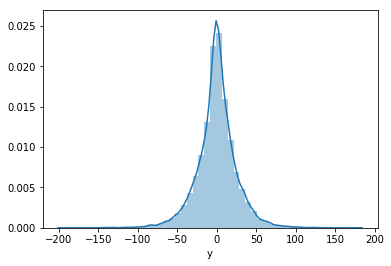

In [20]:
sns.distplot(ytest-ytest_pred)

In [21]:
'''
#holdout test; 
holdout=pd.read_csv('dataset_00_with_header.csv')
randomhold = holdout.sample(n=1000)
pd.DataFrame(randomhold).to_csv('holdout.csv', sep=',', header=True, index=False)
randomhold.head()
'''

"\n#holdout test; \nholdout=pd.read_csv('dataset_00_with_header.csv')\nrandomhold = holdout.sample(n=1000)\npd.DataFrame(randomhold).to_csv('holdout.csv', sep=',', header=True, index=False)\nrandomhold.head()\n"